## Pairwise sequence alignment in R

### Getting started

1. Enter the "my_notebooks" folder and create a new folder "week02".  
2. In the "my_notebooks/week02" folder, open a notebook from this URL https://raw.githubusercontent.com/hlab1/teaching-fb2023/main/week02/week02_p1_seqAln_SARS.ipynb.
3. Clear all outputs by "Kernel"->"Restart Kernel and Clear All Outputs".

**Good housekeeping:** At any time if you want to stop the notebook, remember to "Save and create checkpoint" your notebook before doing "Close and Shutdown Notebook". When you are done for the day, choose "File"->"Hub Control Panel", then click the button "Stop My Server".

### Obtaining protein sequences from UniProt and NCBI

The spike glycoprotein (S) mediates receptor binding and membrane fusion of the virion so it is critical determinant of host range.  We will compare the S protein sequences of the severe acute respiratory syndrome coronavirus (SARS-CoV) and the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
1. Go to the UniProt database (https://www.uniprot.org), search for the accession "Q6R7Y6". Select "Download"->"FASTA (Canonical)" and save the FASTA file to "Q6R7Y6.fasta".
2. Go NCBI (https://www.ncbi.nlm.nih.gov/), search for accession "QHD43416.1" in the "Protein" database. Select "Send to"->"File"->"FASTA"->"Create File" to save the FASTA file to "QHD43416.fasta".
**NOTE:** You might need to remove the .txt file name extension if your OS adds that to the downloaded files.
3. Use the up-arrow button to upload these two files to your JupyterHub "my_notebooks/week02" folder.

In [1]:
library("seqinr")

Use the `read.fasta` function to read these two files.

In [2]:
sars_spike <- read.fasta(file = "Q6R7Y6.fasta")
sars2_spike <- read.fasta(file = "QHD43416.fasta")

Each variable is a list of sequences, so use double square brackets to get the first (and only) sequence in the lists.

In [3]:
sars_spike_seq <- sars_spike[[1]]
sars2_spike_seq <- sars2_spike[[1]]

In [4]:
sars_spike_seq

   [1] "m" "f" "i" "f" "l" "l" "f" "l" "t" "l" "t" "s" "g" "s" "d" "l" "d" "r"
  [19] "c" "t" "t" "f" "d" "d" "v" "q" "a" "p" "n" "y" "t" "q" "h" "t" "s" "s"
  [37] "m" "r" "g" "v" "y" "y" "p" "d" "e" "i" "f" "r" "s" "d" "t" "l" "y" "l"
  [55] "t" "q" "d" "l" "f" "l" "p" "f" "y" "s" "n" "v" "t" "g" "f" "h" "t" "i"
  [73] "n" "h" "t" "f" "g" "n" "p" "v" "i" "p" "f" "k" "d" "g" "i" "y" "f" "a"
  [91] "a" "t" "e" "k" "s" "n" "v" "v" "r" "g" "w" "v" "f" "g" "s" "t" "m" "n"
 [109] "n" "k" "s" "q" "s" "v" "i" "i" "i" "n" "n" "s" "t" "n" "v" "v" "i" "r"
 [127] "a" "c" "n" "f" "e" "l" "c" "d" "n" "p" "f" "f" "a" "v" "s" "k" "p" "m"
 [145] "g" "t" "q" "t" "h" "t" "m" "i" "f" "d" "n" "a" "f" "n" "c" "t" "f" "e"
 [163] "y" "i" "s" "d" "a" "f" "s" "l" "d" "v" "s" "e" "k" "s" "g" "n" "f" "k"
 [181] "h" "l" "r" "e" "f" "v" "f" "k" "n" "k" "d" "g" "f" "l" "y" "v" "y" "k"
 [199] "g" "y" "q" "p" "i" "d" "v" "v" "r" "d" "l" "p" "s" "g" "f" "n" "t" "l"
 [217] "k" "p" "i" "f" "k" "l" "p" "l" "g" "i" "n" "

### Features in the spike protein

From the UniProt page for the SARS-CoV spike protein, in the "Function" section we see that "Spike protein S1: attaches the virion to the cell membrane by interacting with host receptor, initiating the infection".  In the "PTM / Processing" section, we see that residues 14-667 belongs to the Chain (domain) "Spike protein S1".  Can we find the corresponding S1 Chain in the SARS-CoV-2 spike protein?

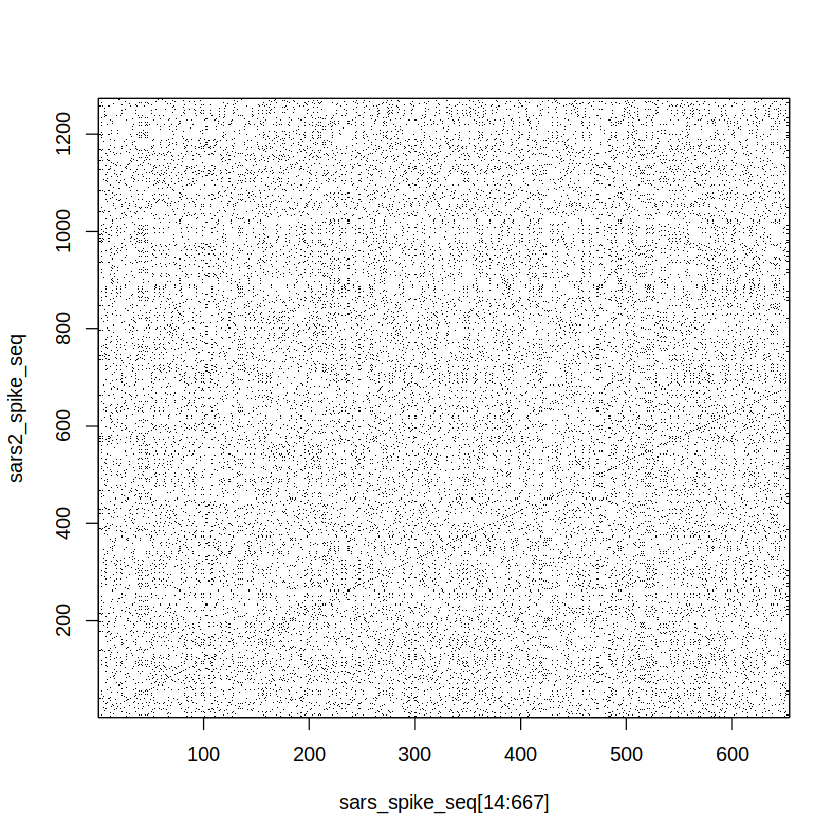

In [5]:
dotPlot(sars_spike_seq[14:667],sars2_spike_seq)

### Pairwise global alignment of DNA sequences using the Needleman-Wunsch algorithm

The `nucleotideSubstitutionMatrix` function from `Biostrings` package creates an object that represents a nucleotide substitution matrix.

In [6]:
library(Biostrings)
sigma <- nucleotideSubstitutionMatrix(match = 2, mismatch = -1, baseOnly = TRUE)
sigma # Print out the matrix

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following object is masked from ‘package:seqinr’:

,A,C,G,T
A,2,-1,-1,-1
C,-1,2,-1,-1
G,-1,-1,2,-1
T,-1,-1,-1,2


The `pairwiseAlignment` function performs (Needleman-Wunsch) global alignment, (Smith-Waterman) local alignment, and (ends-free) overlap alignment problems.  What does the `scoreOnly` argument do?

In [7]:
s1 <- "GAATTC"
s2 <- "GATTA"
globalAligns1s2 <- pairwiseAlignment(s1, s2, 
                                     substitutionMatrix=sigma,gapOpening=-2, gapExtension=-8,
                                     scoreOnly=FALSE)
globalAligns1s2 # Print out the optimal alignment and its score

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTC
subject: GA-TTA
score: -3 

The `Biostrings` package comes with several precomputed scoring matrices.  We can find out which ones are available to use.

In [8]:
data(package="Biostrings")

Package,Item,Title
<chr>,<chr>,<chr>
Biostrings,BLOSUM100,Scoring matrices
Biostrings,BLOSUM45,Scoring matrices
Biostrings,BLOSUM50,Scoring matrices
Biostrings,BLOSUM62,Scoring matrices
Biostrings,BLOSUM80,Scoring matrices
Biostrings,HNF4alpha,Known HNF4alpha binding sequences
Biostrings,PAM120,Scoring matrices
Biostrings,PAM250,Scoring matrices
Biostrings,PAM30,Scoring matrices


Let's load the `BLOSUM50` matrix into memory and align some amino acid sequences.

In [9]:
data(BLOSUM50)

In [10]:
BLOSUM50 # Print out the matrix

,A,R,N,D,C,Q,E,G,H,I,⋯,P,S,T,W,Y,V,B,Z,X,*
A,5,-2,-1,-2,-1,-1,-1,0,-2,-1,⋯,-1,1,0,-3,-2,0,-2,-1,-1,-5
R,-2,7,-1,-2,-4,1,0,-3,0,-4,⋯,-3,-1,-1,-3,-1,-3,-1,0,-1,-5
N,-1,-1,7,2,-2,0,0,0,1,-3,⋯,-2,1,0,-4,-2,-3,4,0,-1,-5
D,-2,-2,2,8,-4,0,2,-1,-1,-4,⋯,-1,0,-1,-5,-3,-4,5,1,-1,-5
C,-1,-4,-2,-4,13,-3,-3,-3,-3,-2,⋯,-4,-1,-1,-5,-3,-1,-3,-3,-2,-5
Q,-1,1,0,0,-3,7,2,-2,1,-3,⋯,-1,0,-1,-1,-1,-3,0,4,-1,-5
E,-1,0,0,2,-3,2,6,-3,0,-4,⋯,-1,-1,-1,-3,-2,-3,1,5,-1,-5
G,0,-3,0,-1,-3,-2,-3,8,-2,-4,⋯,-2,0,-2,-3,-3,-4,-1,-2,-2,-5
H,-2,0,1,-1,-3,1,0,-2,10,-4,⋯,-2,-1,-2,-3,2,-4,0,0,-1,-5
I,-1,-4,-3,-4,-2,-3,-4,-4,-4,5,⋯,-3,-3,-1,-3,-1,4,-4,-3,-1,-5


In [11]:
s3 <- "PAWHEAE"
s4 <- "HEAGAWGHEE"
globalAligns3s4 <- pairwiseAlignment(s3, s4, substitutionMatrix=BLOSUM50, 
                                     gapOpening=-2, gapExtension=-8, scoreOnly=FALSE)
globalAligns3s4 # Print out the optimal global alignment and its score

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AWHEAE
subject: HEAGAWGHEE
score: -5 

**Exercise at home:** From the alignment, you should be able to calculate the alignment score of -5.

### Aligning protein sequences

As you see above the `pairwiseAlignment` function takes sequences that are in the form of a single string ('GAATTC'), but the spike protein sequences we have from before were a vector of single characters (e.g., a vector where the first element is the character 'm', second element is the character 'f', etc).  Therefore, we first need to convert the vector of single charcters to a string, which can be achieved by the `c2s` function.

In [12]:
sars_spike_string <- c2s(sars_spike_seq) 
sars2_spike_string <- c2s(sars2_spike_seq) 

Additionally `pairwiseAlignment` requires the sequences to be in uppercase, so we use the `toupper` function to convert these two strings to uppercase.

In [13]:
sars_spike_string2 <- toupper(sars_spike_string)
sars2_spike_string2 <- toupper(sars2_spike_string)
sars2_spike_string2

[1] "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT"

To get the S1 domain of the SARS-CoV spike protein, which correspond to residues 14 to 667, we need to use the `substr` function that operates on strings.

In [14]:
sars_spike_s1 <- substr(sars_spike_string2,14,667)
sars_spike_s1

[1] "SDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTINHTFGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAVSKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILTAFSPAQDTWGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTPPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHTVSLLR"

What happens if we perform a global alignment of the S1 domain sequence of the SARS-CoV protein against the entire sequence of the SARS-CoV-2 protein?

In [15]:
global_align_spike <- pairwiseAlignment(sars_spike_s1, sars2_spike_string2,
                                        substitutionMatrix = BLOSUM50, gapOpening = -8, 
                                        gapExtension = -2, scoreOnly = FALSE)
global_align_spike # Print out the optimal global alignment and its score

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: SDL---------DRCTTFDD-VQ-APNYTQHTSS...----------------------------------
subject: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTN--SF...CCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT
score: 1863 

When the alignment is very long, you only see the beginning and the end of the alignment.  We provide you a `printPairwiseAlignment` function below that will print the whole alignment. Evaluate this cell ("shift+enter") to get this function into memory.

In [16]:
printPairwiseAlignment <- function(alignment, chunksize=60, returnlist=FALSE) {
     require(Biostrings)           # This function requires the Biostrings package
     seq1aln <- pattern(alignment) # Get the alignment for the first sequence
     seq2aln <- subject(alignment) # Get the alignment for the second sequence
     alnlen  <- nchar(seq1aln)     # Find the number of columns in the alignment
     starts  <- seq(1, alnlen, by=chunksize)
     n       <- length(starts)
     seq1alnresidues <- 0
     seq2alnresidues <- 0
     for (i in 1:n) {
        chunkseq1aln <- substring(seq1aln, starts[i], starts[i]+chunksize-1)
        chunkseq2aln <- substring(seq2aln, starts[i], starts[i]+chunksize-1)
        # Find out how many gaps there are in chunkseq1aln:
        gaps1 <- countPattern("-",chunkseq1aln) # countPattern() is from Biostrings package
        # Find out how many gaps there are in chunkseq2aln:
        gaps2 <- countPattern("-",chunkseq2aln) # countPattern() is from Biostrings package
        # Calculate how many residues of the first sequence we have printed so far in the alignment:
        seq1alnresidues <- seq1alnresidues + chunksize - gaps1
        # Calculate how many residues of the second sequence we have printed so far in the alignment:
        seq2alnresidues <- seq2alnresidues + chunksize - gaps2
        if (returnlist == 'FALSE')
        {
           print(paste(chunkseq1aln,seq1alnresidues))
           print(paste(chunkseq2aln,seq2alnresidues))
           print(paste(' '))
        }
     }
     if (returnlist == 'TRUE')
     {
        vector1 <- s2c(substring(seq1aln, 1, nchar(seq1aln)))
        vector2 <- s2c(substring(seq2aln, 1, nchar(seq2aln)))
        mylist <- list(vector1, vector2)
        return(mylist)
     }
}


Here we use the function to print the spike protein alignment in blocks of 100 aligned columns.

In [17]:
printPairwiseAlignment(global_align_spike, 100)

[1] "SDL---------DRCTTFDD-VQ-APNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTI-----NHT--FGNPVIPFKDGIYFAATEKS 82"
[1] "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTN--SFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKS 98"
[1] " "
[1] "NVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAV----SKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKD 178"
[1] "NIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNID 198"
[1] " "
[1] "GFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAIL----TAFSPAQDT--WGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAE 272"
[1] "GYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSE 298"
[1] " "
[1] "LKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYAD 372"
[1] "TKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYAD 398"
[1] " "
[1] "SFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSP

We can see that the global alignment was able to align the beginning of the two sequences but then forced to create a large gap in the shorter sequence so the alignment is end-to-end.

The `pairwiseAlignment` function can also perform local alignments by specifying "type=local":

In [18]:
local_align_spike <- pairwiseAlignment(sars_spike_s1, sars2_spike_string2,
                                    substitutionMatrix = BLOSUM50, 
                                    gapOpening = -8, gapExtension = -2, scoreOnly = FALSE, type="local")
local_align_spike # Print out the optimal local alignment and its score

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [15] PNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLF...QAGCLIGAEHVDTSYECDIPIGAGICASYHT
subject: [26] PAYTN--SFTRGVYYPDKVFRSSVLHSTQDLF...RAGCLIGAEHVNNSYECDIPIGAGICASYQT
score: 3080 

Again we can use `printPairwiseAlignment` to view the entire alignment

In [19]:
printPairwiseAlignment(local_align_spike, 100)

[1] "PNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTI-----NHT--FGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNS 93"
[1] "PAYTN--SFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNA 98"
[1] " "
[1] "TNVVIRACNFELCDNPFFAV----SKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTL 189"
[1] "TNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSAL 198"
[1] " "
[1] "KPIFKLPLGINITNFRAIL----TAFSPAQDT--WGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPS 283"
[1] "EPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPT 298"
[1] " "
[1] "GDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNY 383"
[1] "ESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNY 398"
[1] " "
[1] "KLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTP-PALNCYWPLNDYGFYTT

Now we are pulling out only part of the SARS-CoV-2 spike protein sequencce, which should be the S1 domain.  What is the approximate range of this domain in the entire protein sequence?  How does this compare to what you saw in the dot plot at the beginning?